# Trabalho 1 de Aprendizado de Máquina

Sobre Regressão Linear Univariada, Multivariada e Regularizada.

- **Aluna:** Bárbara Neves
- **Matrícula:** 388713

## Descrição 

1. A atividade permite o uso das bibliotecas Numpy e Matplotlib, mas não a Scikit-Learn. 
2. Os métodos devem ser implementados usando a interface mostrada em sala de aula (métodos fit e predict).
3. Executar as seguintes tarefas de implementação e comentar o que se pede.

## Imports iniciais

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Importando os módulos das implementações feitas
from modules import linear_models, metrics, utils

## 1. Implementações dos métodos
## 2. Implementações das funções de avaliação

Foram criados 3 módulos (arquivos *``` .py ```*) para guardar as implementações solicitadas, além de outras funções criadas para facilitar o entendimento das análises feitas neste trabalho. 

Os arquivos estão na pasta ``` modules/ ```, e a seguir estão os nomes e a descrição de cada um.

- **``` metrics ```:** contém as implementações das métricas de erro. 
- **``` linear_models ```:** contém as implementações dos modelos lineares.
- **``` utils ```:** contém as implementações extras criadas para auxiliar nas análises, como plot de gráficos.

O import desses arquivos foi feito acima a partir do seguinte comando: 
``` from modules import linear_models, metrics, utils ```

### h. Regressão Linear Regularizada Multivariada - Gradiente Descendente

## Análises
## 3. Leitura do primeiro conjunto de dados: *Boston House Price*

In [2]:
df1 = pd.DataFrame(columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PIRATIO', 
                           'B', 'LSTAT', 'MEDV'])

data = np.loadtxt('data_trab1/housing.data')

for vet in data:
    df1 = df1.append({
        'CRIM': vet[0], 
        'ZN': vet[1], 
        'INDUS': vet[2],
        'CHAS': vet[3], 
        'NOX': vet[4],
        'RM': vet[5],
        'AGE': vet[6],
        'DIS': vet[7],
        'RAD': vet[8],
        'TAX': vet[9],
        'PIRATIO': vet[10],
        'B': vet[11],
        'LSTAT': vet[12],
        'MEDV': vet[13]
    }, ignore_index=True)
    
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 4. X e y

A variável LSTAT servirá como atributo preditor (X) e a variável MEDV como atributo alvo (y).

In [3]:
X = df1['LSTAT'].values
y = df1['MEDV'].values

X.shape, y.shape

((506,), (506,))

## 5. Dividindo o conjunto de dados

Dividindo o conjunto de dados em 80% para treino e 20% para teste.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((404,), (404,)), ((102,), (102,)))

## 6. Executar os métodos das alternativas a, b, f e g da 1ª questão

In [5]:
# from sklearn.preprocessing import normalize
# X_train = normalize(X_train[:,np.newaxis], axis=0).ravel()
# X_test = normalize(X_test[:,np.newaxis], axis=0).ravel()

linear_models1 = {
    'LR_AM': linear_models.LRAnalyticalMethod(),
    'LR_GD': linear_models.LRGradientDescent(),
    'QLR': linear_models.QuadraticLN(),
    'CLR': linear_models.CubicLN()
}

for k, v in linear_models1.items():
    if k == 'LR_GD':
        v.fit(X_train, y_train, epochs=80000, learning_rate=0.001)
    else:
        v.fit(X_train, y_train)

### a. MSE e R² para os conjuntos de treino e teste

#### Valores

In [6]:
pred_values1, scores1 = utils.calculates_error_metrics(linear_models1, X_train, y_train, X_test, y_test)

scores1

{'Train': {'LR_AM_MSE': 39.76038682967429,
  'LR_AM_R2': 0.5423180734793516,
  'LR_GD_MSE': 39.760386829674296,
  'LR_GD_R2': 0.5423180734793516,
  'QLR_MSE': 53.3250378785081,
  'QLR_R2': 0.3861753364580617,
  'CLR_MSE': 63.96585430530064,
  'CLR_R2': 0.263688868133959},
 'Test': {'LR_AM_MSE': 33.51954917268489,
  'LR_AM_R2': 0.5429180422970386,
  'LR_GD_MSE': 33.51954909679531,
  'LR_GD_R2': 0.5429180433318901,
  'QLR_MSE': 45.65953127944843,
  'QLR_R2': 0.37737384719908473,
  'CLR_MSE': 55.590565101269,
  'CLR_R2': 0.24195148940105238}}

#### Visualização 

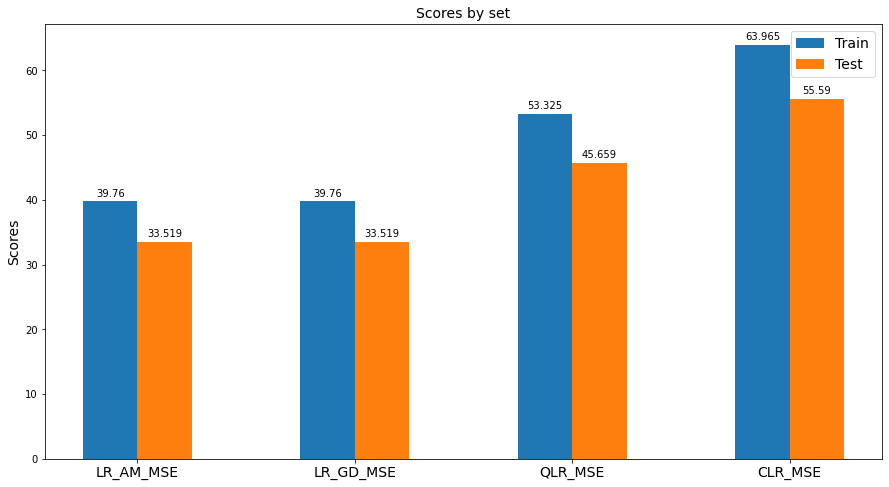

In [7]:
# MSE
utils.plot_scores_histogram(linear_models1, scores1, 'MSE')

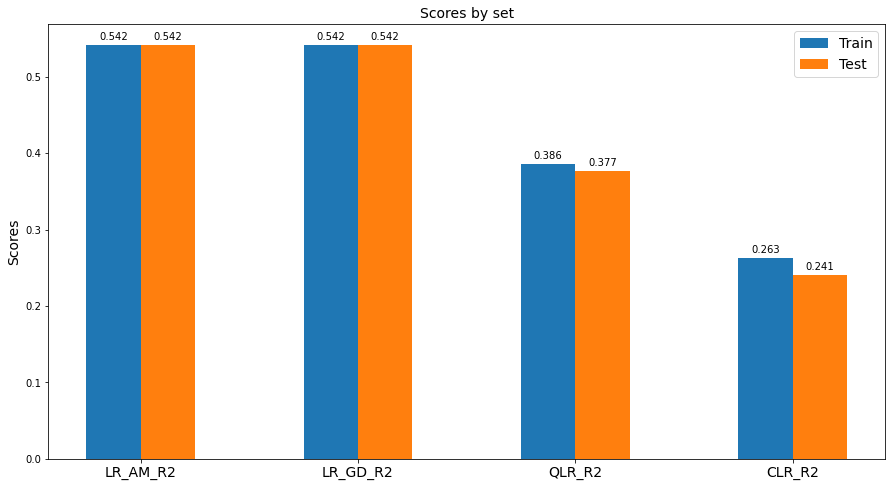

In [8]:
# R²
utils.plot_scores_histogram(linear_models1, scores1, 'R2')

### b. Coeficientes

In [9]:
for k, v in linear_models1.items():
    print('Linear model -> {}: b_0 = {}, b_1 = {}'.format(k, v.coef_()[0], v.coef_()[1]))

Linear model -> LR_AM: b_0 = 34.836949820318516, b_1 = -0.9665309019503535
Linear model -> LR_GD: b_0 = 34.83694970819148, b_1 = -0.9665308951490615
Linear model -> QLR: b_0 = 27.91222309538048, b_1 = -0.024879577135618256
Linear model -> CLR: b_0 = 25.57766700983826, b_1 = -0.0006699697296534989


### c. Qual o melhor modelo linear?

Avaliando os modelos com as métricas de erro (**MSE** e **R²**), podemos chegar a conclusão de qual obteve a melhor performance. 

Resumindo o significado de cada métrica:
- **MSE**: é a média do quadrado dos erros. Quanto maior for o número, maior será o erro. Erro, neste caso, significa a diferença entre os valores observados e os preditos.
- **R2**: varia entre -∞ e 1. Está intimamente relacionado ao MSE, mas indica a variância total explicada pelo modelo sobre a variância total. Portanto, se o valor for próximo de 1, as variáveis estão perfeitamente correlacionadas.

De acordo com essas definições, e com os valores e gráficos exibidos acima, podemos chegar em algumas conclusões:

0. Em geral, comparando as predições de todos os modelos entre conjuntos de treino e teste, os valores estão bem aproximados.
1. Os métodos LR_AM (Regressão Linear Método Análitico) e LR_GD (Regressão Linear Gradiente Descendente) obtiveram os menores resultados para o **MSE**. Os valores estão bem próximos (diferença muito *muito* pequena) e não acho justo escolher um. Mas, ainda fazendo a comparação de valores e olhando apenas para a predição feita para do conjunto de teste, o modelo que obteve a "melhor" perfomance foi o **LR_GD**.
2. Da mesma maneira, analisando a métrica **R²**, os métodos que obtiveram melhor performance foram o LR_AM e o LR_GD. Também possuem scores bastante iguais e também não acho justo escolher um. Como também foi feito anteriormente, analisando os valores para o conjunto de teste, o modelo que obteve melhor perfomance também foi o **LR_GD**.
3. Creio que os modelos QLR (Regressão Linear Quadrática) e CRL (Regressão Linear Cúbica) não se saíram bem porque esses dados possuem característica mais linear.

**Comentário extra:** Apesar do modelo com Gradiente Descendente ter resultados para as métricas de erro um pouco melhor (bem pouco mesmo), foram necessários alguns testes mudando as quantidades de épocas e a taxa de aprendizado (parecido com o que foi feito para o outro conjunto de dados com os métodos da Regressão Multivariada) até obter os valores atuais utilizados acima.

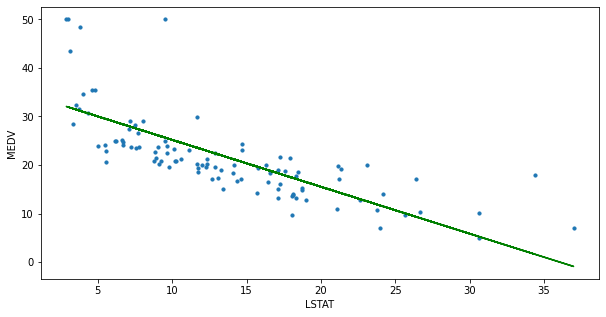

In [10]:
utils.plot_line_graphic(X_test, y_test, pred_values1['Test']['LR_GD'], 'LSTAT', 'MEDV')

## 7. Leitura do segundo conjunto de dados

In [11]:
df2 = pd.read_csv('data_trab1/trab1_advertising.csv')

df2.drop('Unnamed: 0', inplace=True, axis=1)
df2.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [12]:
# O vetor alvo (y) é a última coluna
X = df2.values[:, :-1]
y = df2.values[:, -1]

X.shape, y.shape

((200, 3), (200,))

In [13]:
# DDividindo o conjunto de dados em 80% para treino e 20% para teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((160, 3), (160,)), ((40, 3), (40,)))

## 8.  Executar os métodos das alternativas c, d, e e f da 1ª questão

In [ ]:
# h. Regressão Linear Regularizada Multivariada - Gradiente Descendente
class LRRegularized():
    def __init__(self): 
        pass 

    def fit(self, X, y, epochs, learning_rate, lamb): 
        n = X.shape[0] # Números de amostras
        p = X.shape[1] # Número de variáveis (atributos)
        X_ = np.c_[np.ones(n), X]
        
        cost = np.zeros(epochs)
        B = np.zeros(p + 1)
        
        # Aplicando gradiente descendente
        for e in range(epochs):
            y_pred = X_.dot(B)
      
            D_0 = (1/n) * sum(y - y_pred)
            b_0 = b_0 + learning_rate * D_0  
            
            for j 
            
            cost[e] = metrics.MSE(y, y_pred)
            
        self.b_0 = b_0
        self.b_1 = b_1
        self.cost = cost
  
    def predict(self, X):  
        return self.b_0 + self.b_1 * X
    
    def coef_(self):
        return [self.b_0, self.b_1]
    
    def cost_history(self): # Apenas para escolher uma época boa
        return self.cost

In [14]:
from sklearn.preprocessing import StandardScaler

linear_models2 = {
    'MLR_AM': linear_models.MLRAnalyticalMethod(),
    'MLR_GD': linear_models.MLRGradientDescent(),
    'MLR_EGD': linear_models.MLRStochasticGradientDescent(),
}

# Normalizando os dados
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Épocas para o método de Regressão Linear Multivariada - Gradiente Descendente e Estocástico
iter_gd = 50000
iter_egd = 1000

for k, v in linear_models2.items():
    if k == 'MLR_GD':
        v.fit(X_train, y_train, epochs=iter_gd, learning_rate=0.0001)
    elif k == 'MLR_EGD':
        v.fit(X_train, y_train, epochs=iter_egd, learning_rate=0.0001)
    else:
        v.fit(X_train, y_train)

### a. MSE e R² para os conjuntos de treino e teste

In [15]:
pred_values2, scores2 = utils.calculates_error_metrics(linear_models2, X_train, y_train, X_test, y_test)

scores2

{'Train': {'MLR_AM_MSE': 2.7051294230814142,
  'MLR_AM_R2': 0.8957008271017817,
  'MLR_GD_MSE': 2.7187121513786296,
  'MLR_GD_R2': 0.8951771304109643,
  'MLR_EGD_MSE': 2.705134885491815,
  'MLR_EGD_R2': 0.8957006164926766},
 'Test': {'MLR_AM_MSE': 3.174097353976116,
  'MLR_AM_R2': 0.8994380241009117,
  'MLR_GD_MSE': 3.2185013773652598,
  'MLR_GD_R2': 0.8980312127048188,
  'MLR_EGD_MSE': 3.1759111837341583,
  'MLR_EGD_R2': 0.8993805582187815}}

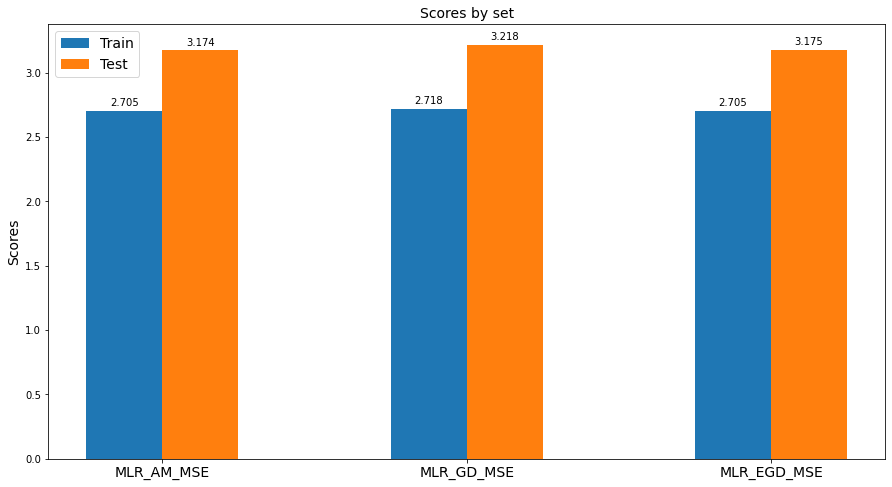

In [16]:
utils.plot_scores_histogram(linear_models2, scores2, 'MSE')

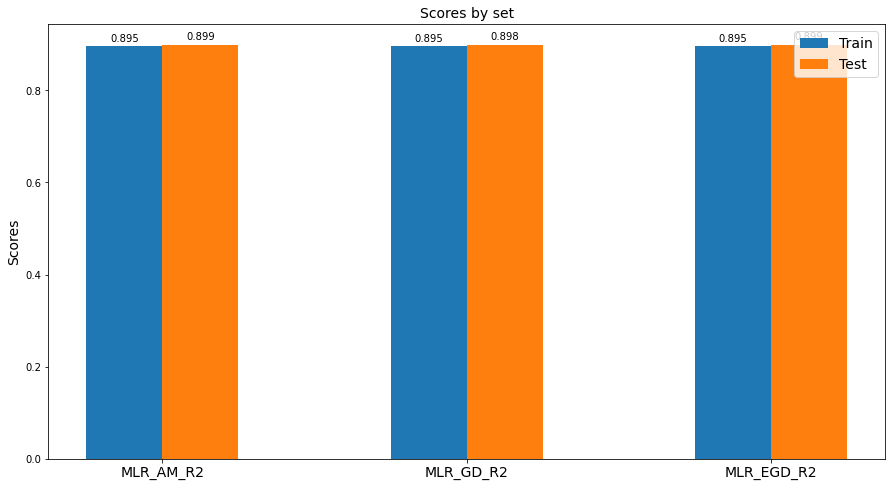

In [17]:
utils.plot_scores_histogram(linear_models2, scores2, 'R2')

### b. Coeficientes

Os valores dos coeficientes estão bem próximos.

In [18]:
for k, v in linear_models2.items():
    print('Linear model -> {}: {})'.format(k, v.coef_()))

Linear model -> MLR_AM: [14.1         3.76419618  2.79230665  0.05597551])
Linear model -> MLR_GD: [14.0050187   3.74446937  2.73487377  0.11421007])
Linear model -> MLR_EGD: [14.09984582  3.76432236  2.793066    0.05789744])


### c. Plot da métrica MSE para cada época do Gradiente Descendente e Estocástico do método Regressão Linear Multivariada

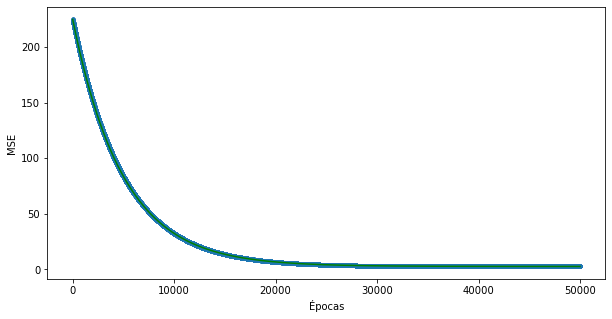

In [19]:
utils.plot_line_graphic(range(iter_gd), linear_models2['MLR_GD'].cost_history(), linear_models2['MLR_GD'].cost_history(), 'Épocas', 'MSE')

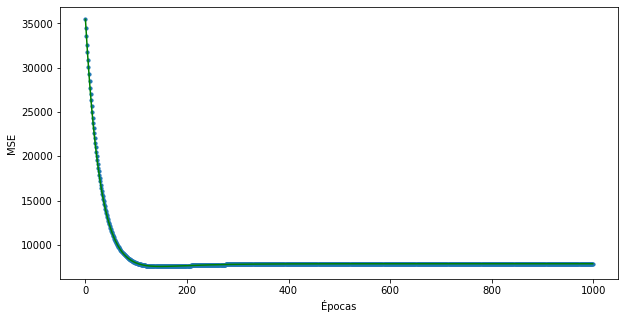

In [20]:
utils.plot_line_graphic(range(iter_egd), linear_models2['MLR_EGD'].cost_history(), linear_models2['MLR_EGD'].cost_history(), 'Épocas', 'MSE')

### Qual dos métodos converge mais rápido?

De acordo com os gráficos acima, o método que converge mais rápido (claramente) é o **MLR_EGD (Regressão Linear Multivariada Gradiente Estocástico)**. Foram feitos testes observando os gráficos acima até obter a melhor taxa de aprendizado: 0.0001.

### d. Plot da métrica MSE para o método Regressão Linear Regularizada Multivariada - Gradiente Descendente

Conjunto de treino e o conjunto de teste (duas linhas) variando λ = 1,2,3,4,5.

Se aumentar o lamda os coeficientes devem diminuir em valores absolutos
Se diminuir o lambda, os coeficientes serão maiores

### Qual valor de λ é mais adequado?